In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive/')
import sys
sys.path.append('/content/drive/MyDrive/Research-experiments')

Mounted at /content/drive/


In [ ]:
%cd '/content/drive/My Drive/Research-experiments/synth_experments_results/v1'

/content/drive/My Drive/Research-experiments/synth_experments_results/v1


Processing file: Experiment_Results
Processing file: fd_metrics_with_pvalues.csv
Plotting metrics from group: fd_metrics (3 metrics)


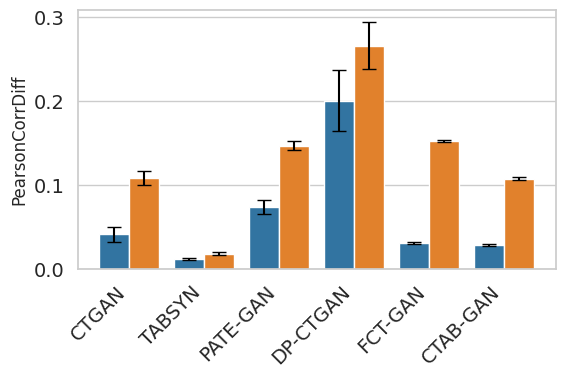

Saved plot: Experiment_Results/plots/fd_metrics_PearsonCorrDiff.pdf


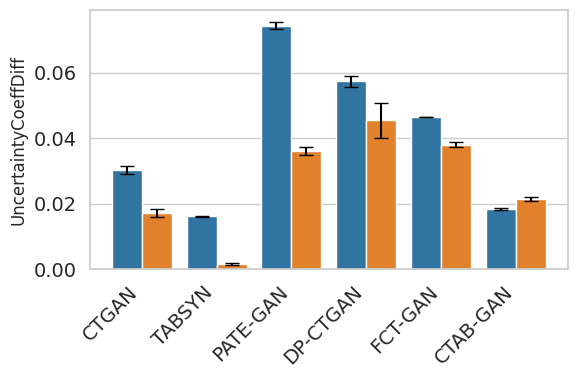

Saved plot: Experiment_Results/plots/fd_metrics_UncertaintyCoeffDiff.pdf


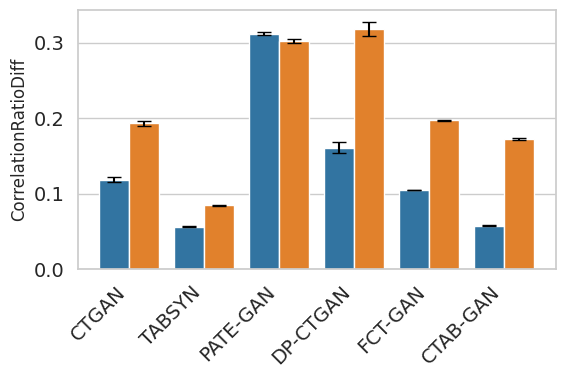

Saved plot: Experiment_Results/plots/fd_metrics_CorrelationRatioDiff.pdf
Processing file: stat_sim_with_pvalues.csv
Plotting metrics from group: stat_sim (2 metrics)


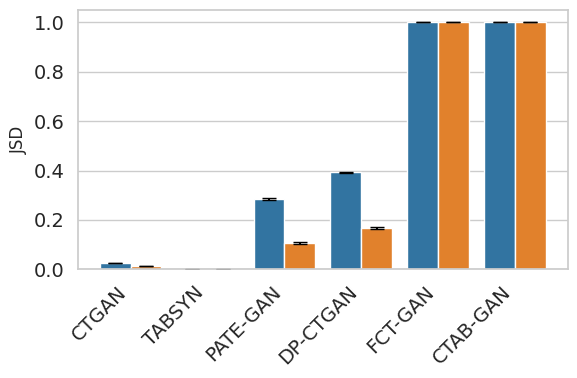

Saved plot: Experiment_Results/plots/stat_sim_JSD.pdf


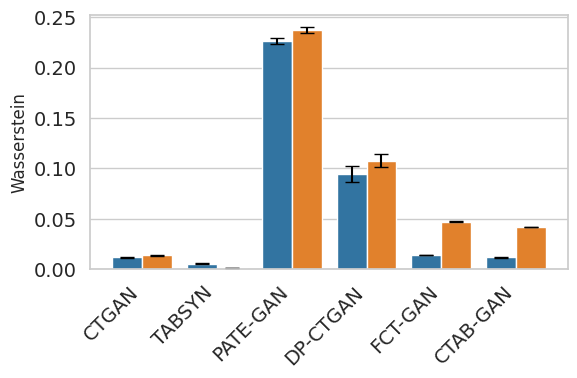

Saved plot: Experiment_Results/plots/stat_sim_Wasserstein.pdf
Processing file: ml_utility_with_pvalues.csv
Plotting metrics from group: ml_utility (4 metrics)


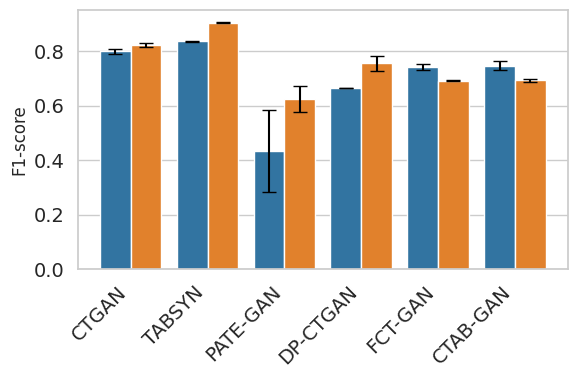

Saved plot: Experiment_Results/plots/ml_utility_F1-score.pdf


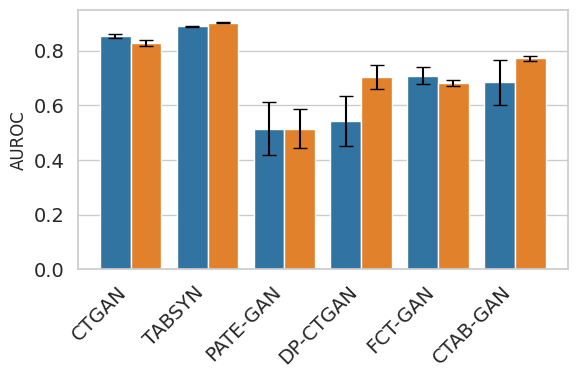

Saved plot: Experiment_Results/plots/ml_utility_AUROC.pdf


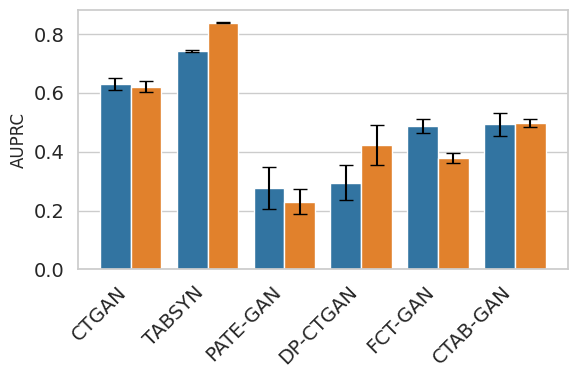

Saved plot: Experiment_Results/plots/ml_utility_AUPRC.pdf


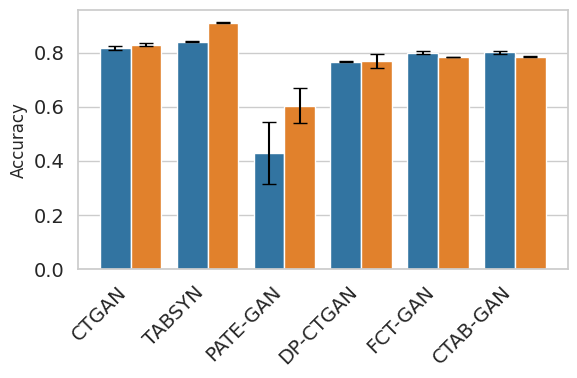

Saved plot: Experiment_Results/plots/ml_utility_Accuracy.pdf
Processing file: privacy_metrics_with_pvalues.csv
Plotting metrics from group: privacy_metrics (2 metrics)


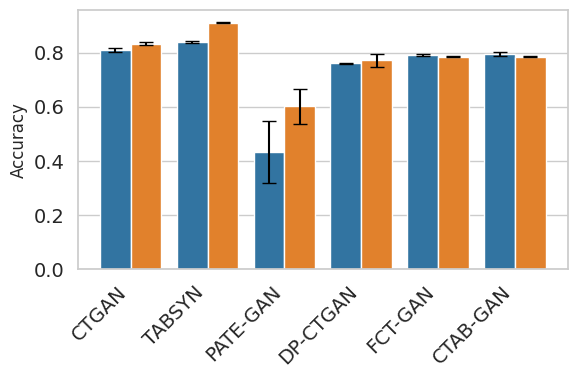

Saved plot: Experiment_Results/plots/privacy_metrics_Accuracy.pdf


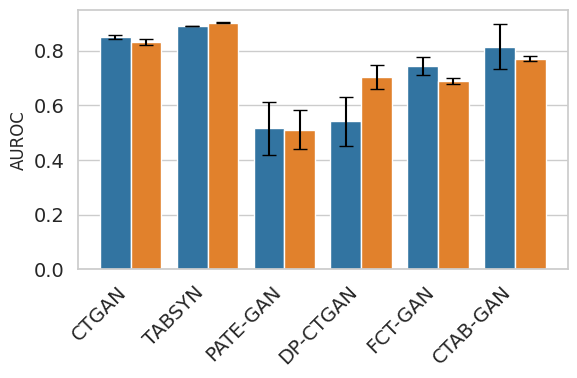

Saved plot: Experiment_Results/plots/privacy_metrics_AUROC.pdf


In [ ]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

os.makedirs("Experiment_Results/plots", exist_ok=True)

dataset_colors = {
    'adult': '#1f77b4',
    'credit': '#ff7f0e'
}

sns.set_theme(style="whitegrid", palette="muted")

plt.rcParams.update({
                'figure.figsize': (6, 4),
                'pdf.fonttype': 42,
                'ps.fonttype': 42,
                'font.size': 14,
                'axes.titlesize': 14,
                'axes.labelsize': 12,
                'xtick.labelsize': 14,
                'ytick.labelsize': 14
                })

for filename in os.listdir("."):
    print(f"Processing file: {filename}")
    if filename.endswith(".csv"):
        group_name = filename.replace("_with_pvalues.csv", "")
        #file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(filename)

        metric_cols = [col for col in df.columns if col not in ['dataset', 'model']
                        and not col.endswith('_p') and not col.endswith('_std')]

        print(f"Plotting metrics from group: {group_name} ({len(metric_cols)} metrics)")

        for metric in metric_cols:
            std_col = f"{metric}_std"
            if std_col not in df.columns:
                df[std_col] = 0.0

            plot_df = df[['dataset', 'model', metric, std_col]].copy()
            plot_df = plot_df.rename(columns={metric: "value", std_col: "std"})
             # ✅ Insert model renaming here
            model_display_names = {
                "ctgan": "CTGAN",
                "tabsyn": "TABSYN",
                "pategan": "PATE-GAN",
                "dpctgan": "DP-CTGAN",
                "fctgan": "FCT-GAN",
                "ctabgan": "CTAB-GAN"
            }
            plot_df["model"] = plot_df["model"].map(model_display_names).fillna(plot_df["model"])

            #plt.figure(figsize=(10, 6))


            ax = sns.barplot(
                data=plot_df,
                x="model",
                y="value",
                hue="dataset",
                palette=dataset_colors,
                errorbar=None,
                err_kws={'linewidth': 1.5}
            )

            ax.set_xlabel("")
            # Manually add error bars
            # Add error bars manually
            # Correctly add error bars using bar patches
            for bar, (_, row) in zip(ax.patches, plot_df.iterrows()):
                x = bar.get_x() + bar.get_width() / 2
                y = bar.get_height()
                ax.errorbar(
                    x,
                    y,
                    yerr=row['std'],
                    fmt='none',
                    ecolor='black',
                    capsize=5,
                    linewidth=1.5
                )
            #ax.set_title(f"{metric} ({group_name})", fontsize=14)
            #ax.set_xlabel("Model", fontsize=12)
            ax.set_ylabel(metric)
            plt.xticks(rotation=45, ha='right')
            ax.legend_.remove()
            plt.tight_layout()
            plt.draw()
            filename = f"Experiment_Results/plots/{group_name}_{metric}.pdf".replace(" ", "_")
            plt.savefig(filename)
            plt.show()
            plt.close()
            print(f"Saved plot: {filename}")


In [ ]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create output directory
os.makedirs("Experiment_Results/plots", exist_ok=True)

# Style
sns.set_theme(style="whitegrid", palette="muted")

# Fonts & Layout
plt.rcParams.update({
    'figure.figsize': (10, 6),
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'font.size': 12,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 11,
    'ytick.labelsize': 11
})

# Color mapping
dataset_colors = {
    'adult': '#1f77b4',
    'credit': '#ff7f0e'
}

# Model name mapping
model_display_names = {
    "ctgan": "CTGAN",
    "tabsyn": "TABSYN",
    "pategan": "PATE-GAN",
    "dpctgan": "DP-CTGAN",
    "fctgan": "FCT-GAN",
    "ctabgan": "CTAB-GAN"
}

# Loop over CSVs
for filename in os.listdir("."):
    if filename.endswith(".csv") and "with_pvalues" in filename:
        group_name = filename.replace("_with_pvalues.csv", "")
        df = pd.read_csv(filename)

        metric_cols = [col for col in df.columns if col not in ['dataset', 'model']
                       and not col.endswith('_p') and not col.endswith('_std')]

        print(f"📊 Processing: {group_name} — {len(metric_cols)} metrics")

        for metric in metric_cols:
            std_col = f"{metric}_std"
            if std_col not in df.columns:
                df[std_col] = 0.0

            plot_df = df[['dataset', 'model', metric, std_col]].copy()
            plot_df = plot_df.rename(columns={metric: "value", std_col: "std"})
            plot_df["model"] = plot_df["model"].map(model_display_names).fillna(plot_df["model"])

            # Plot
            fig, ax = plt.subplots(figsize=(10, 6))
            barplot = sns.barplot(
                data=plot_df,
                x="model",
                y="value",
                hue="dataset",
                palette=dataset_colors,
                ax=ax,
                errorbar=None
            )

            # Overlay error bars manually
            for bars in ax.containers:
                for bar in bars:
                    height = bar.get_height()
                    x = bar.get_x() + bar.get_width() / 2

                    label = bar.get_label()  # dataset
                    xtick = bar.get_x() + bar.get_width() / 2
                    width = bar.get_width()

                    # Get corresponding model and dataset
                    model = ax.get_xticklabels()[int(x)].get_text()
                    dataset = bars.get_label()

                    match = plot_df[(plot_df["model"] == model) & (plot_df["dataset"] == dataset)]
                    if not match.empty:
                        std_val = match["std"].values[0]
                        ax.errorbar(
                            x,
                            height,
                            yerr=std_val,
                            fmt='none',
                            ecolor='black',
                            capsize=4,
                            elinewidth=1.2
                        )

            ax.set_xlabel("Model")
            ax.set_ylabel(metric)
            plt.xticks(rotation=45, ha='right')
            ax.legend_.remove()

            # Save plot
            fig.tight_layout()
            output_path = f"Experiment_Results/plots/{group_name}_{metric}.pdf".replace(" ", "_")
            fig.savefig(output_path, format='pdf', bbox_inches='tight', dpi=300)
            plt.close(fig)

            print(f"✅ Saved: {output_path}")


📊 Processing: fd_metrics — 3 metrics
✅ Saved: Experiment_Results/plots/fd_metrics_PearsonCorrDiff.pdf
✅ Saved: Experiment_Results/plots/fd_metrics_UncertaintyCoeffDiff.pdf
✅ Saved: Experiment_Results/plots/fd_metrics_CorrelationRatioDiff.pdf
📊 Processing: stat_sim — 2 metrics
✅ Saved: Experiment_Results/plots/stat_sim_JSD.pdf
✅ Saved: Experiment_Results/plots/stat_sim_Wasserstein.pdf
📊 Processing: ml_utility — 4 metrics
✅ Saved: Experiment_Results/plots/ml_utility_F1-score.pdf
✅ Saved: Experiment_Results/plots/ml_utility_AUROC.pdf
✅ Saved: Experiment_Results/plots/ml_utility_AUPRC.pdf
✅ Saved: Experiment_Results/plots/ml_utility_Accuracy.pdf
📊 Processing: privacy_metrics — 2 metrics
✅ Saved: Experiment_Results/plots/privacy_metrics_Accuracy.pdf
✅ Saved: Experiment_Results/plots/privacy_metrics_AUROC.pdf
